In [1]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import math
from datetime import timedelta
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:939: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [2]:
dataset_name_list = ["ambient_temperature_system_failure",
                     "ec2_cpu_utilization_ac20cd",
                     "exchange-2_cpc_results",
                     "exchange-2_cpm_results",
                     "exchange-3_cpm_results",
                     "ibm-common-stock-closing-prices",
                     "rds_cpu_utilization_cc0c53",
                     "artificial_cd_1_random_removal",
                     "nyc_taxi_random_removal",
                     "artificial_cd_3_random_removal"]
true_outlier_indices_dict = {}
ad_dict = {}

# ambient_temperature_system_failure

In [3]:
dataset_name = "ambient_temperature_system_failure"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2013-07-04 00:00:00
End date:  2014-05-28 15:00:00
Missing time stamps: 
 DatetimeIndex(['2013-07-28 02:00:00', '2013-07-28 05:00:00',
               '2013-07-28 06:00:00', '2013-07-28 07:00:00',
               '2013-07-28 08:00:00', '2013-07-28 09:00:00',
               '2013-07-28 10:00:00', '2013-07-28 11:00:00',
               '2013-07-28 12:00:00', '2013-07-28 13:00:00',
               ...
               '2014-04-10 05:00:00', '2014-04-10 06:00:00',
               '2014-04-10 07:00:00', '2014-04-10 08:00:00',
               '2014-04-10 09:00:00', '2014-04-10 10:00:00',
               '2014-04-10 11:00:00', '2014-04-10 12:00:00',
               '2014-04-10 13:00:00', '2014-04-10 14:00:00'],
              dtype='datetime64[ns]', length=621, freq=None)
Length:  7888
Time step size:  1H
Date Format:  %Y-%m-%d %H:%M:%S


# ec2_cpu_utilization_ac20cd

In [4]:
dataset_name = "ec2_cpu_utilization_ac20cd"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-15 00:49:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-02 14:29:00
End date:  2014-04-16 14:49:00
Missing time stamps: 
 DatetimeIndex(['2014-04-07 13:39:00', '2014-04-07 13:44:00',
               '2014-04-14 23:49:00', '2014-04-14 23:54:00',
               '2014-04-14 23:59:00'],
              dtype='datetime64[ns]', freq=None)
Length:  4037
Time step size:  5min
Start Date:  2014-04-02 14:29:00
End Date:  2014-04-16 14:49:00
Date Format:  %Y-%m-%d %H:%M:%S


# exchange-2_cpc_results

In [5]:
dataset_name = "exchange-2_cpc_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

data =data.drop_duplicates(subset="timestamp")

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-14 13:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-2_cpm_results

In [6]:
dataset_name = "exchange-2_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
data = data.dropna()
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data =data.drop_duplicates(subset="timestamp")

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-3_cpm_results

In [7]:
dataset_name = "exchange-3_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-08-19 18:15:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:15:01
End date:  2011-09-07 14:15:01
Missing time stamps: 
 DatetimeIndex(['2011-07-07 03:15:01', '2011-07-07 04:15:01',
               '2011-07-08 03:15:01', '2011-07-08 04:15:01',
               '2011-07-08 05:15:01', '2011-07-08 07:15:01',
               '2011-07-08 08:15:01', '2011-07-08 11:15:01',
               '2011-07-08 12:15:01', '2011-07-08 13:15:01',
               ...
               '2011-09-01 14:15:01', '2011-09-01 15:15:01',
               '2011-09-01 16:15:01', '2011-09-01 17:15:01',
               '2011-09-04 18:15:01', '2011-09-04 20:15:01',
               '2011-09-05 14:15:01', '2011-09-05 16:15:01',
               '2011-09-06 00:15:01', '2011-09-06 13:15:01'],
              dtype='datetime64[ns]', length=109, freq=None)
Length:  1647
Time step size:  1H
Start Date:  2011-07-01 00:15:01
End Date:  2011-09-07 14:15:01
Date Format:  %Y-%m-%d %H:%M:%S


# ibm-common-stock-closing-prices

In [8]:
dataset_name = "ibm-common-stock-closing-prices"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path,header=0)
data["Date"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")

data["timestamp"] = data["Date"]
del data["Date"]
data["value"] = data["IBM common stock closing prices"]
del data["IBM common stock closing prices"]

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

missing = adclasses.find_missing_time_steps(start_date, end_date, '1D', data)
print("Missing time steps: ", missing)

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1D", dateformat="%Y-%m-%d", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())

true_outlier_dates = ["1965-06-08 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  1962-01-02T00:00:00.000000000
End date:  1965-12-31T00:00:00.000000000
Missing time steps:  DatetimeIndex(['1962-01-06', '1962-01-07', '1962-01-13', '1962-01-14',
               '1962-01-20', '1962-01-21', '1962-01-27', '1962-01-28',
               '1962-02-03', '1962-02-04',
               ...
               '1965-11-28', '1965-12-04', '1965-12-05', '1965-12-11',
               '1965-12-12', '1965-12-18', '1965-12-19', '1965-12-24',
               '1965-12-25', '1965-12-26'],
              dtype='datetime64[ns]', length=452, freq=None)
Length:  1460
Time step size:  1D
Start Date:  1962-01-02T00:00:00.000000000
End Date:  1965-12-31T00:00:00.000000000
Date Format:  %Y-%m-%d


# rds_cpu_utilization_cc0c53

In [9]:
dataset_name = "rds_cpu_utilization_cc0c53"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '5min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="5min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-02-14 14:30:00
End date:  2014-02-28 14:30:00
Missing time stamps: 
 DatetimeIndex(['2014-02-25 07:10:00'], dtype='datetime64[ns]', freq='5T')
Length:  4033
Time step size:  5min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_1_random_removal

In [10]:
dataset_name = "artificial_cd_1_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-03 18:35:00
Missing time stamps: 
 DatetimeIndex(['2014-04-02 05:40:00', '2014-04-02 16:40:00',
               '2014-04-03 12:50:00', '2014-04-03 12:55:00'],
              dtype='datetime64[ns]', freq=None)
Length:  800
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-03 18:35:00
Date Format:  %Y-%m-%d %H:%M:%S


# nyc_taxi_random_removal

In [11]:
dataset_name = "nyc_taxi_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '30min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="30min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-07-01 00:00:00
End date:  2015-01-31 23:30:00
Missing time stamps: 
 DatetimeIndex(['2014-07-01 10:30:00', '2014-07-11 18:00:00',
               '2014-08-03 09:30:00', '2014-10-16 17:00:00',
               '2014-10-17 00:30:00', '2014-12-06 12:30:00',
               '2014-12-06 13:00:00', '2014-12-06 13:30:00',
               '2014-12-06 14:00:00'],
              dtype='datetime64[ns]', freq=None)
Length:  10320
Time step size:  30min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_3_random_removal

In [12]:
dataset_name = "artificial_cd_3_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-04 11:15:00
Missing time stamps: 
 DatetimeIndex(['2014-04-01 01:20:00', '2014-04-02 02:05:00',
               '2014-04-03 11:50:00'],
              dtype='datetime64[ns]', freq=None)
Length:  1000
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-04 11:15:00
Date Format:  %Y-%m-%d %H:%M:%S


In [13]:
weight_fp_list = []
for i in range(1,11):
    weight_fp_list.append(i/10)
print(weight_fp_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# Donut Results

In [14]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_donut = joblib.load("anomaly_scores/Donut/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_donut["Anomaly Scores"]

In [15]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.2: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.3: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.4: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.5: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.6: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.7: {'precision': 0.11538461538461539, 'recall': 1.0},
 0.8: {'precision': 0.15789473684210525, 'recall': 1.0},
 0.9: {'precision': 0.15789473684210525, 'recall': 1.0},
 1.0: {'precision': 0.5, 'recall': 0.3333333333333333}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  13.399999999999999
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


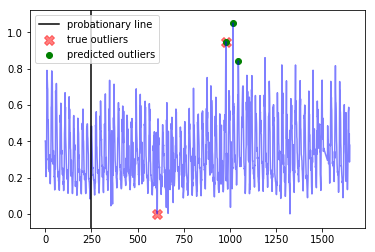




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


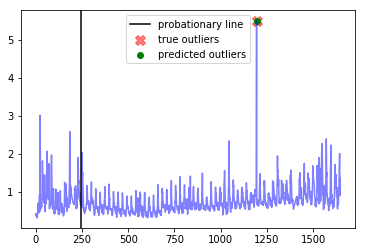




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


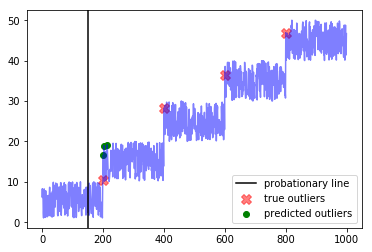




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


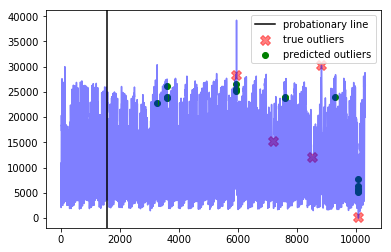




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


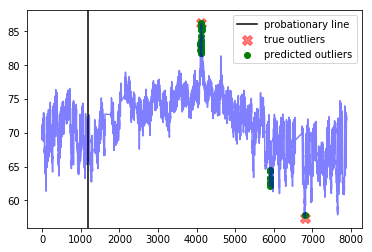




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


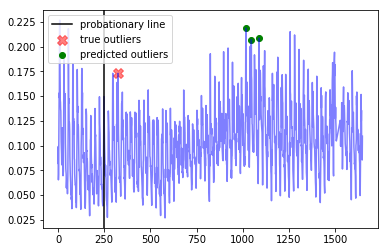




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


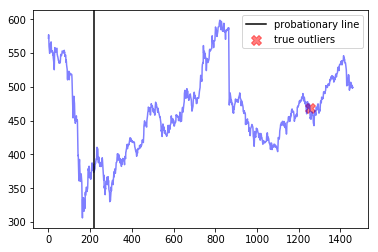




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

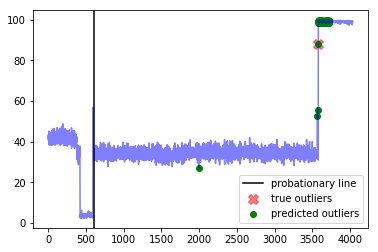




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


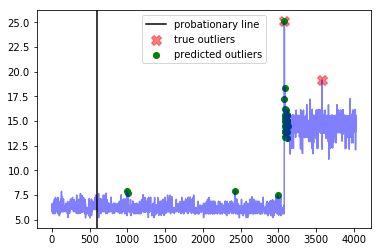




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


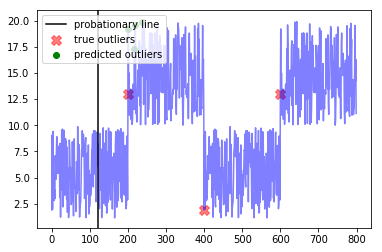

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  14.799999999999997
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


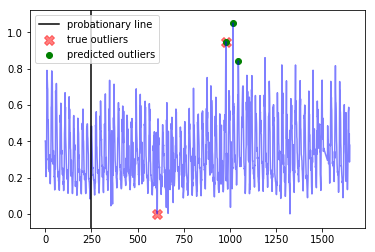




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


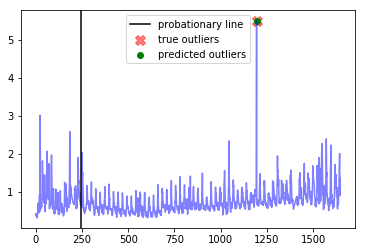




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


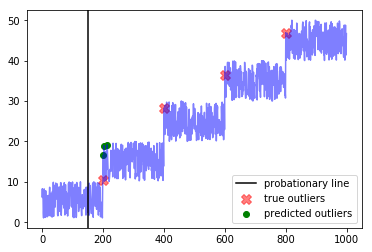




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


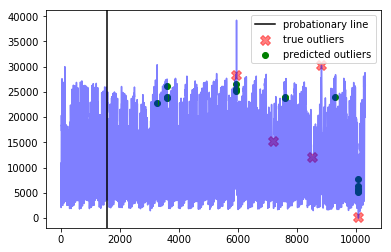




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


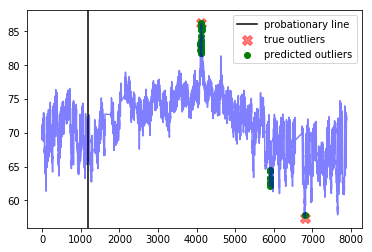




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


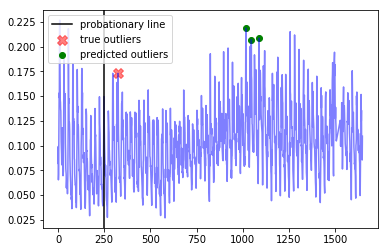




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


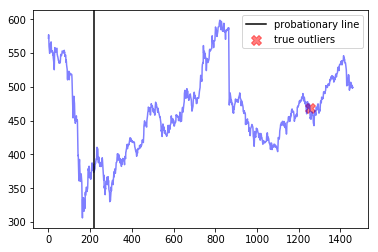




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

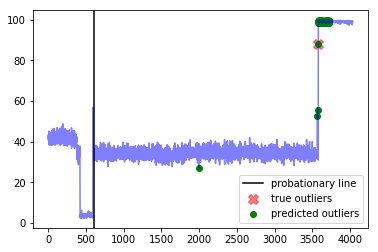




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


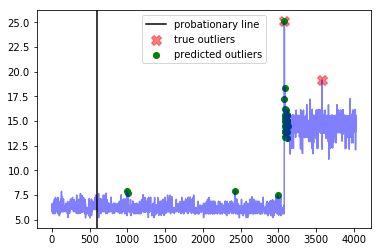




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


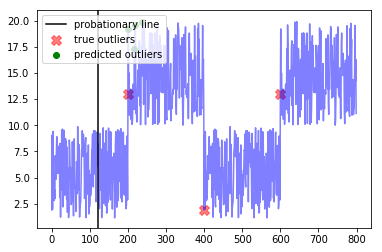

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  16.200000000000003
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


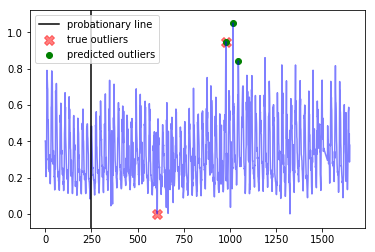




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


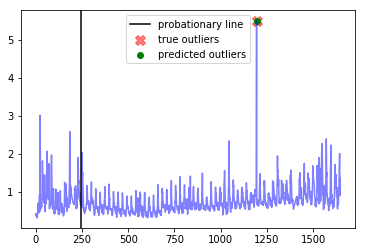




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


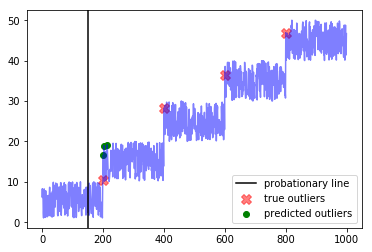




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


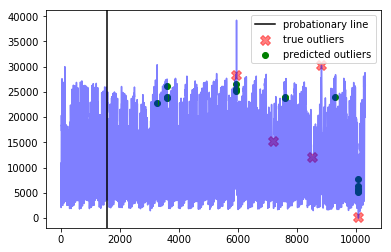




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


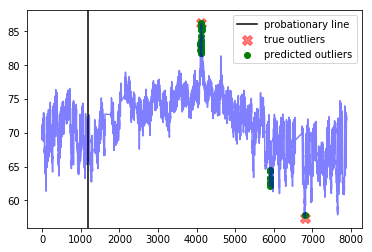




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


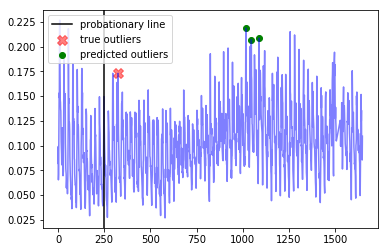




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


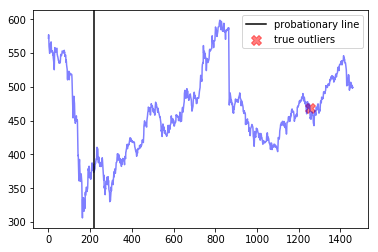




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

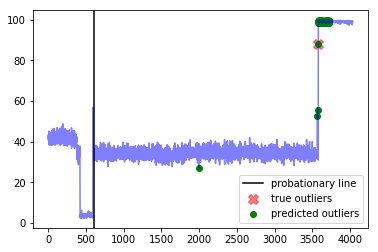




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


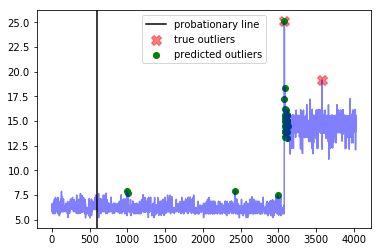




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


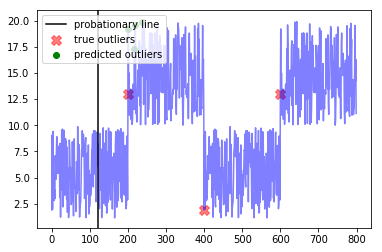

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  17.6
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


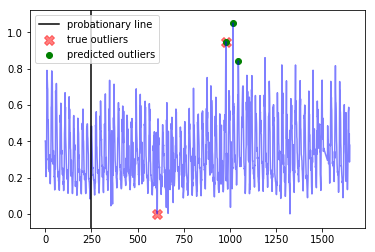




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


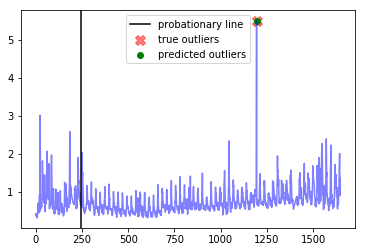




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


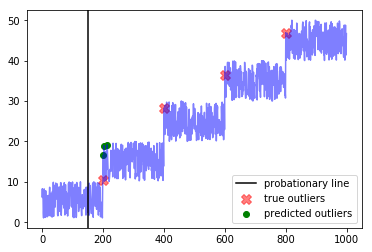




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


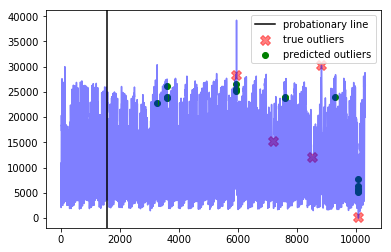




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


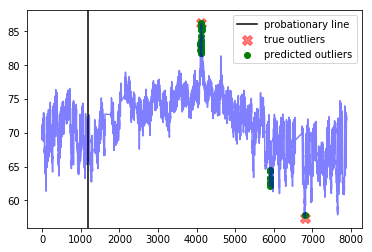




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


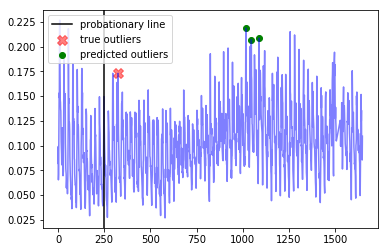




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


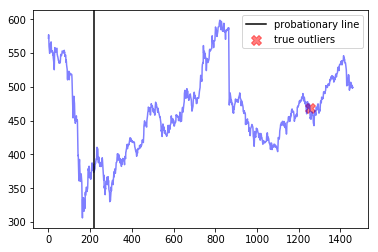




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

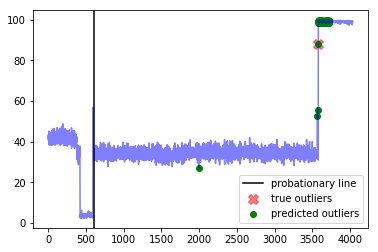




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


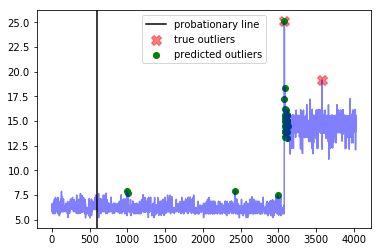




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


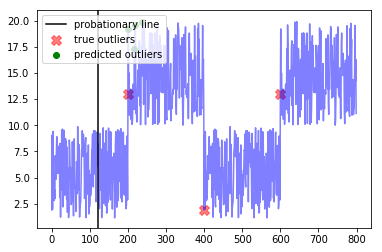

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.0
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


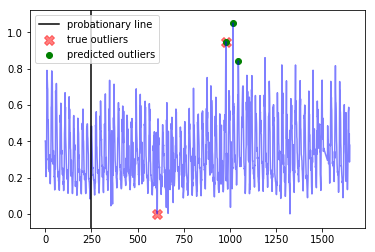




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


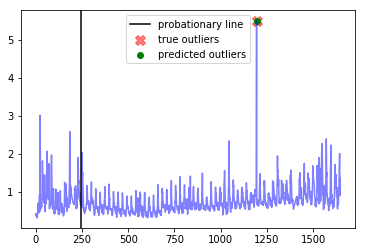




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


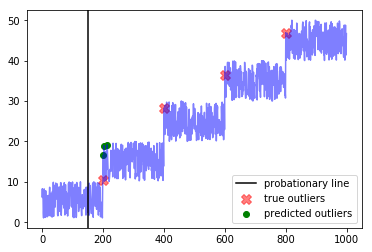




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


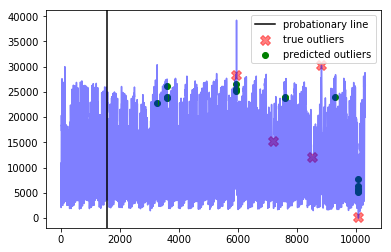




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


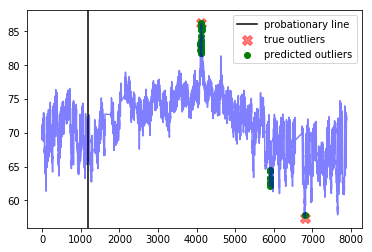




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


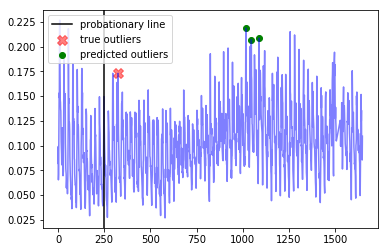




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


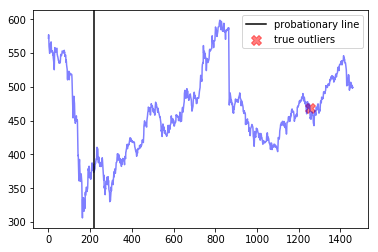




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

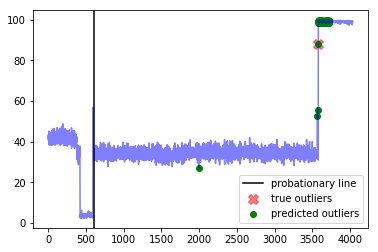




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


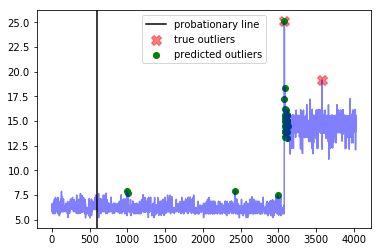




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


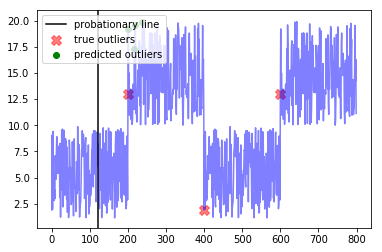

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.4
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


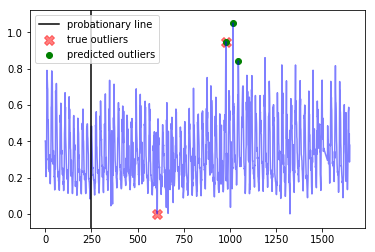




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


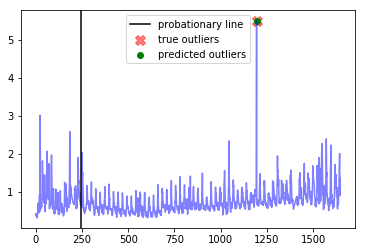




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


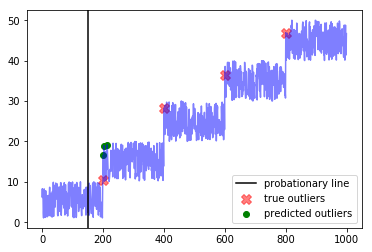




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


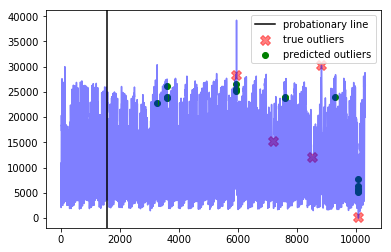




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


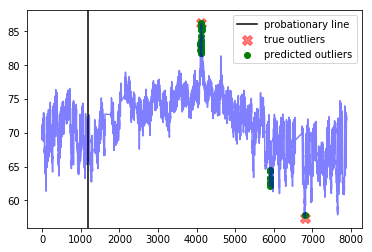




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


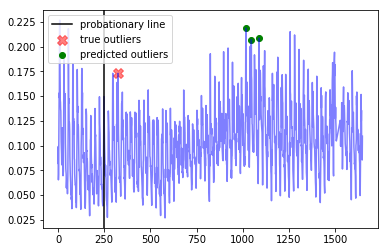




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


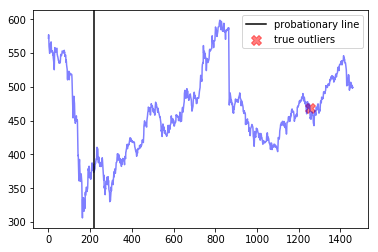




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

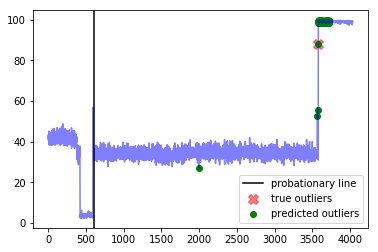




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


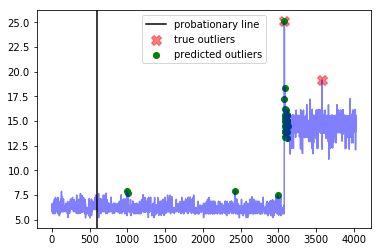




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


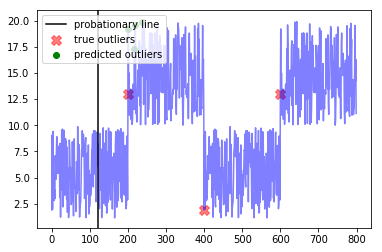

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  21.799999999999997
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


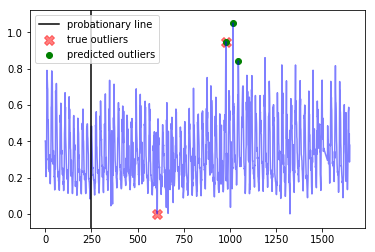




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


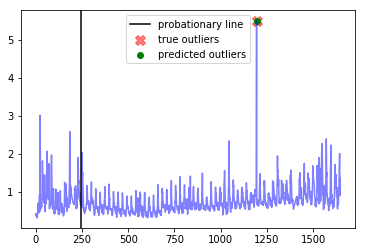




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


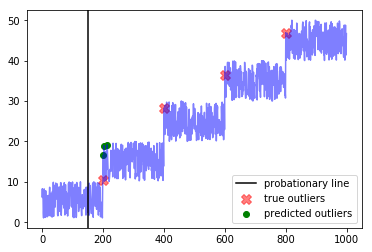




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


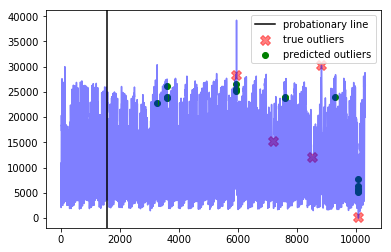




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


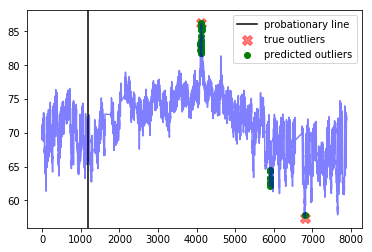




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


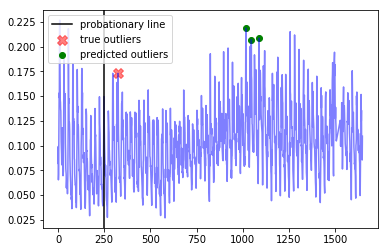




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


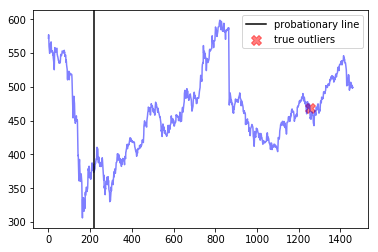




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

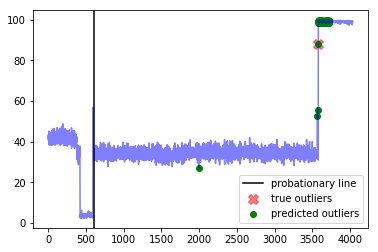




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


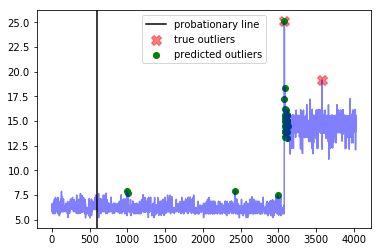




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


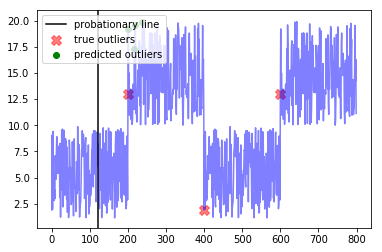

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  23.200000000000006
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


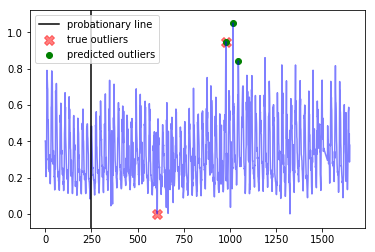




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


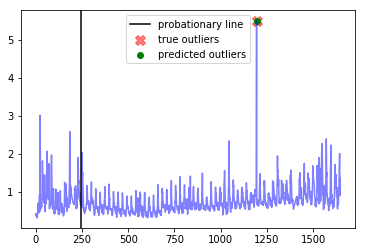




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


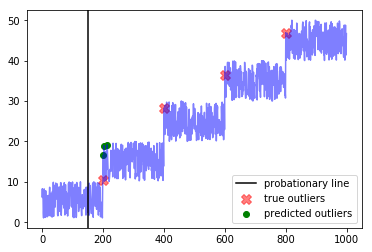




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


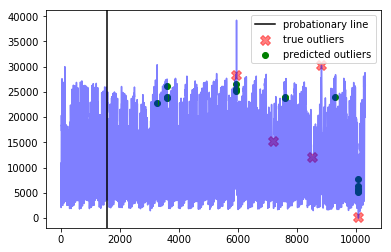




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


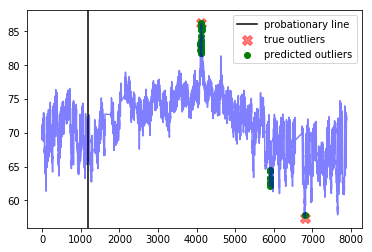




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


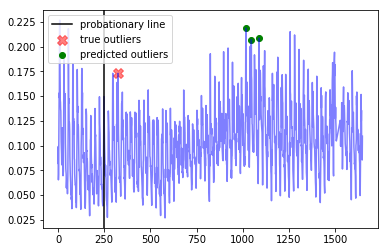




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


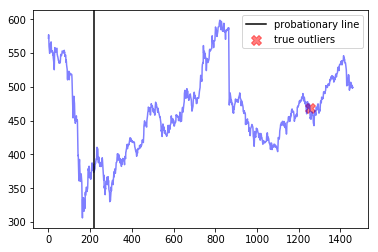




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

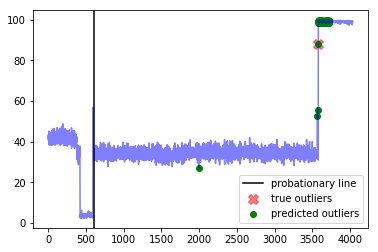




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


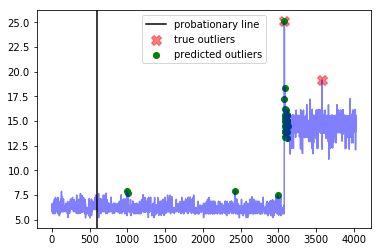




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


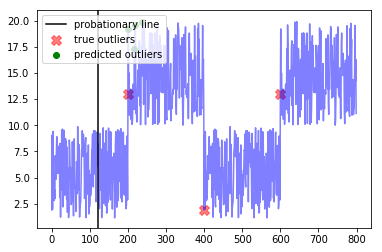

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  24.6
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


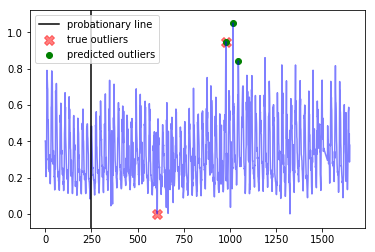




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


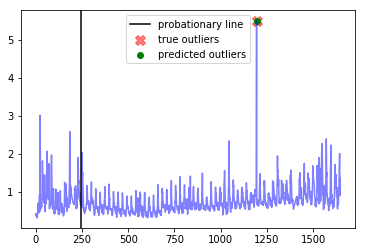




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


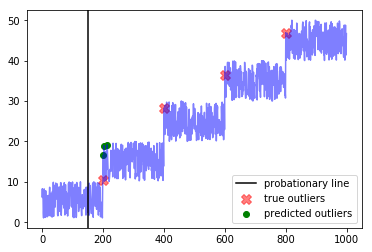




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


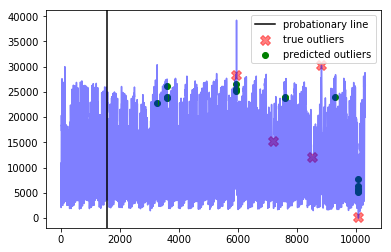




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


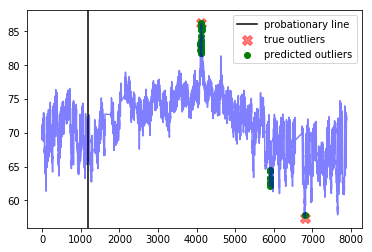




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


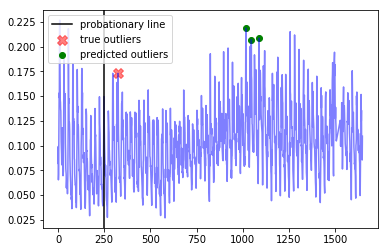




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


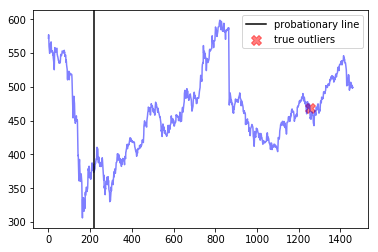




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

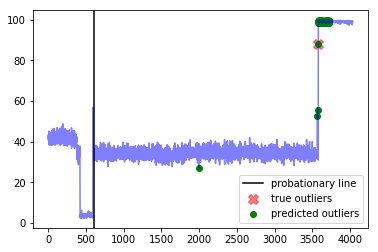




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


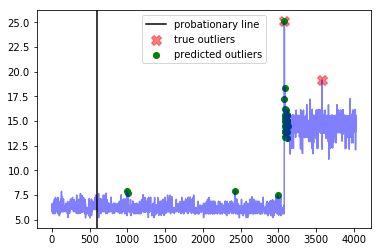




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


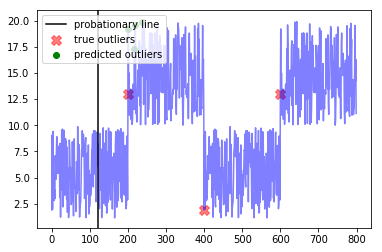

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  26.0
Best window threshold:  1.0
Corresponding window overall precision:  0.45454545454545453
Corresponding window overall recall:  0.45454545454545453
Corresponding window overall F score:  0.45454545454545453



--- exchange-2_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977, 1016, 1045]


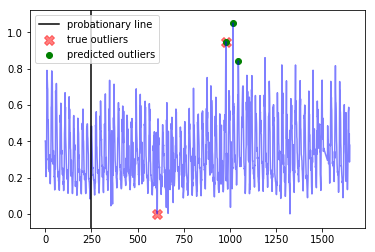




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


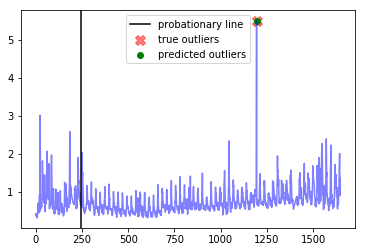




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 214]


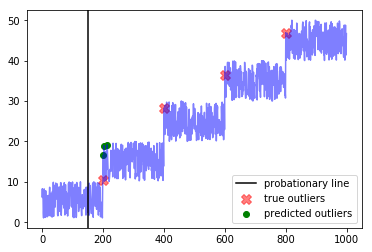




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  0.4
Corresponding window false positives:  5
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [3246, 3581, 3582, 3583, 5170, 5929, 5930, 5931, 7609, 7610, 7611, 7612, 7613, 7614, 9295, 10063, 10064, 10065, 10066, 10067, 10068]


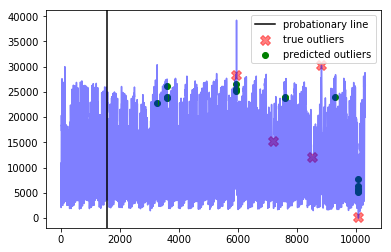




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4112, 4113, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4131, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 6798]


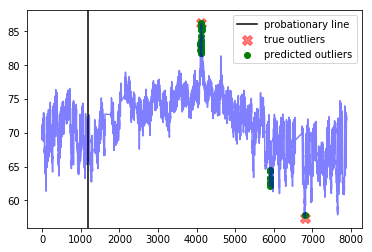




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1016, 1046, 1088]


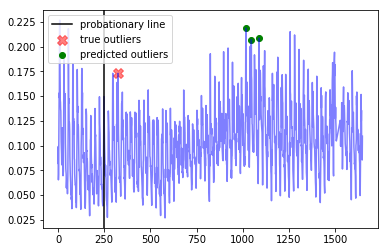




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


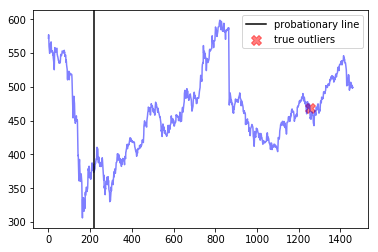




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.3333333333333333
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1999, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 36

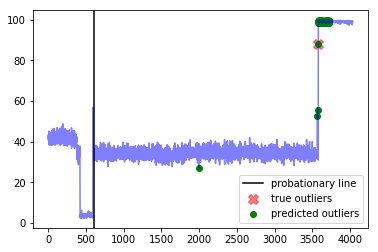




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.25
Corresponding window recall:  0.5
Corresponding window false positives:  3
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [992, 1006, 2426, 2996, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123]


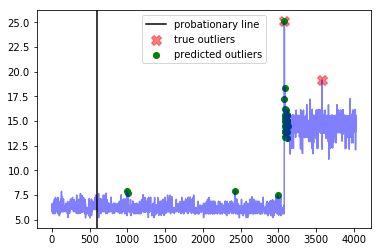




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 217, 219, 238]


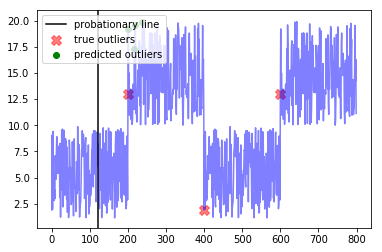

------------
False Positive Weight:  0.1
	 Corresponding window overall recall : 0.45454545454545453
	 Corresponding window overall precision : 0.45454545454545453
	 Minimum number of mistakes : 13.399999999999999
	 Best window threshold : 1.0
	 Corresponding window overall F score : 0.45454545454545453
False Positive Weight:  0.2
	 Corresponding window overall recall : 0.45454545454545453
	 Corresponding window overall precision : 0.45454545454545453
	 Minimum number of mistakes : 14.799999999999997
	 Best window threshold : 1.0
	 Corresponding window overall F score : 0.45454545454545453
False Positive Weight:  0.3
	 Corresponding window overall recall : 0.45454545454545453
	 Corresponding window overall precision : 0.45454545454545453
	 Minimum number of mistakes : 16.200000000000003
	 Best window threshold : 1.0
	 Corresponding window overall F score : 0.45454545454545453
False Positive Weight:  0.6
	 Corresponding window overall recall : 0.45454545454545453
	 Corresponding window 

In [16]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# STL Residual Results

In [17]:
stl_dataset_name_list = ["ambient_temperature_system_failure",
                         "exchange-2_cpc_results",
                         "exchange-2_cpm_results",
                         "exchange-3_cpm_results",
                         "nyc_taxi_random_removal"]

stl_ad_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_ad_dict[dataset_name] = ad_dict[dataset_name]
    
stl_true_outlier_indices_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_true_outlier_indices_dict[dataset_name] = true_outlier_indices_dict[dataset_name]

In [18]:
anomaly_scores_dict = {}

for dataset_name in stl_dataset_name_list:
    output_dict_stl = joblib.load("anomaly_scores/stl/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_stl["Anomaly Scores"]

In [19]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, stl_true_outlier_indices_dict)

{0.1: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.2: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.3: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.4: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.5: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.6: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.7: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.8: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.9: {'precision': 0.11764705882352941, 'recall': 1.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  4.7
Best window threshold:  0.9999
Corresponding window overall precision:  0.2903225806451613
Corresponding window overall recall:  0.8181818181818182
Corresponding window overall F score:  0.4285714285714286



--- exchange-2_cpm_results ---
Corresponding window precision:  0.18181818181818182
Corresponding window recall:  1.0
Corresponding window false positives:  9
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [323, 355, 360, 365, 424, 601, 640, 664, 665, 801, 802, 899, 923, 951, 968, 976, 977, 978, 1002, 1016, 1103, 1104, 1521, 1522]


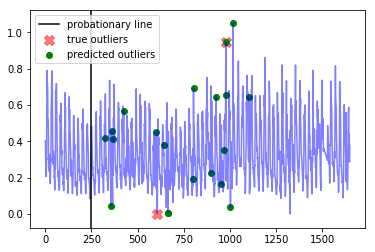




--- exchange-3_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 836, 1044, 1146, 1169, 1170, 1193, 1194, 1217, 1218, 1307, 1531, 1536]


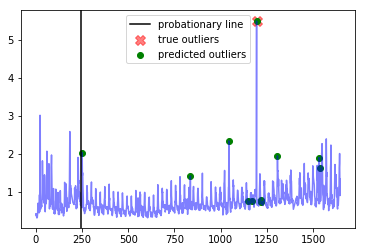




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.375
Corresponding window recall:  0.6
Corresponding window false positives:  5
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3266, 3279, 3280, 3615, 5282, 5908, 5954, 5955, 6002, 6003, 7647, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 10000, 10047, 10048, 10049]


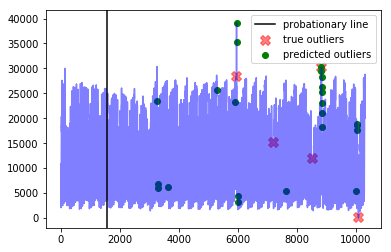




--- exchange-2_cpc_results ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 438, 824, 1016, 1142, 1306, 1354, 1484, 1485, 1486, 1515]


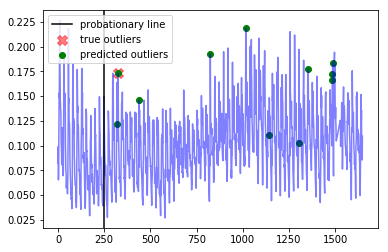




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.4
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2518, 4123, 4149, 4628, 6749, 6751, 6752, 7649, 7669, 7671, 7673, 7674, 7790]


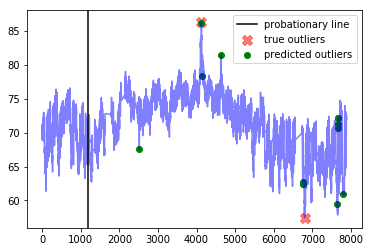

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  7.4
Best window threshold:  0.9999
Corresponding window overall precision:  0.2903225806451613
Corresponding window overall recall:  0.8181818181818182
Corresponding window overall F score:  0.4285714285714286



--- exchange-2_cpm_results ---
Corresponding window precision:  0.18181818181818182
Corresponding window recall:  1.0
Corresponding window false positives:  9
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [323, 355, 360, 365, 424, 601, 640, 664, 665, 801, 802, 899, 923, 951, 968, 976, 977, 978, 1002, 1016, 1103, 1104, 1521, 1522]


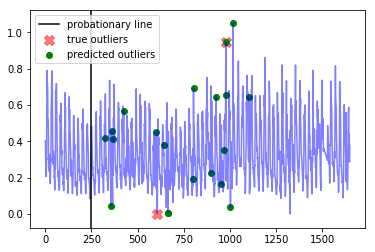




--- exchange-3_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 836, 1044, 1146, 1169, 1170, 1193, 1194, 1217, 1218, 1307, 1531, 1536]


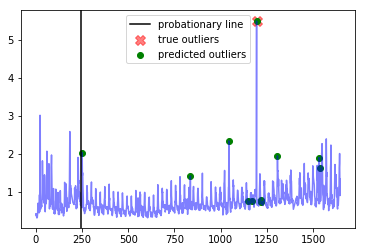




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.375
Corresponding window recall:  0.6
Corresponding window false positives:  5
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3266, 3279, 3280, 3615, 5282, 5908, 5954, 5955, 6002, 6003, 7647, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 10000, 10047, 10048, 10049]


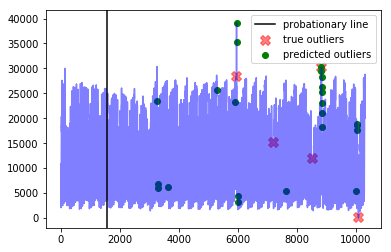




--- exchange-2_cpc_results ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 438, 824, 1016, 1142, 1306, 1354, 1484, 1485, 1486, 1515]


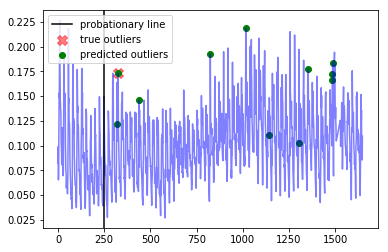




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.4
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2518, 4123, 4149, 4628, 6749, 6751, 6752, 7649, 7669, 7671, 7673, 7674, 7790]


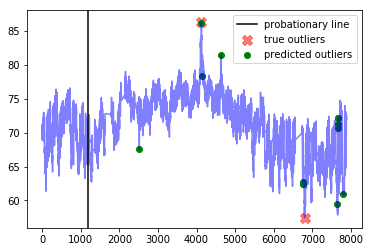

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.1
Best window threshold:  0.9999
Corresponding window overall precision:  0.2903225806451613
Corresponding window overall recall:  0.8181818181818182
Corresponding window overall F score:  0.4285714285714286



--- exchange-2_cpm_results ---
Corresponding window precision:  0.18181818181818182
Corresponding window recall:  1.0
Corresponding window false positives:  9
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [323, 355, 360, 365, 424, 601, 640, 664, 665, 801, 802, 899, 923, 951, 968, 976, 977, 978, 1002, 1016, 1103, 1104, 1521, 1522]


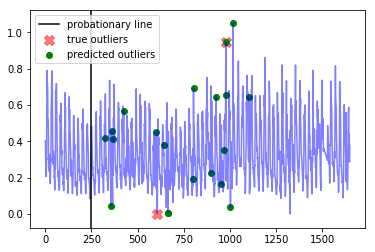




--- exchange-3_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 836, 1044, 1146, 1169, 1170, 1193, 1194, 1217, 1218, 1307, 1531, 1536]


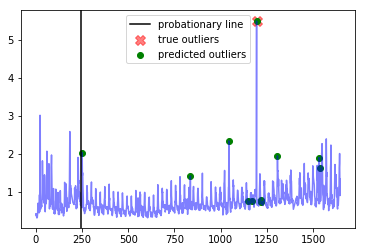




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.375
Corresponding window recall:  0.6
Corresponding window false positives:  5
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3266, 3279, 3280, 3615, 5282, 5908, 5954, 5955, 6002, 6003, 7647, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 10000, 10047, 10048, 10049]


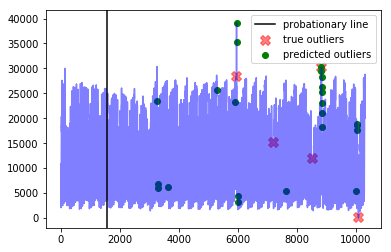




--- exchange-2_cpc_results ---
Corresponding window precision:  0.14285714285714285
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 438, 824, 1016, 1142, 1306, 1354, 1484, 1485, 1486, 1515]


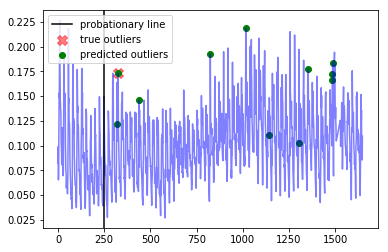




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.4
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2518, 4123, 4149, 4628, 6749, 6751, 6752, 7649, 7669, 7671, 7673, 7674, 7790]


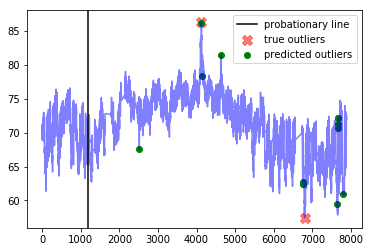

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.4
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


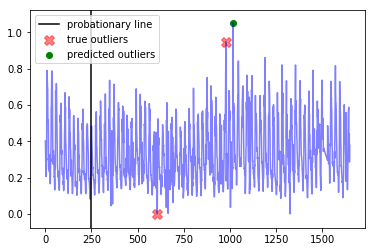




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


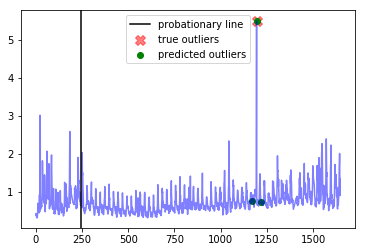




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


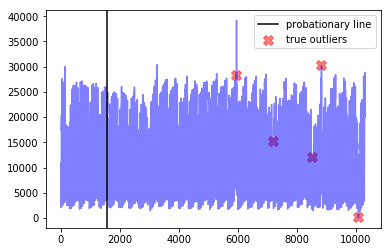




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


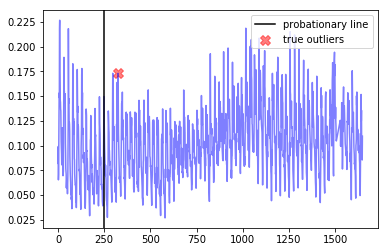




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


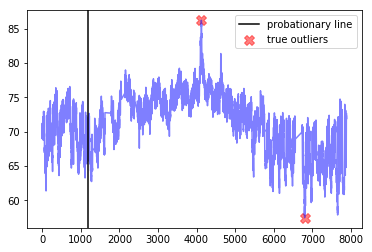

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.5
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


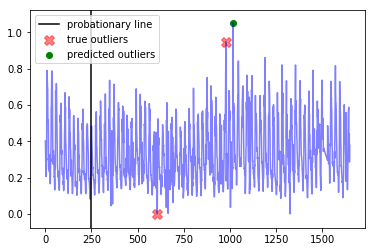




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


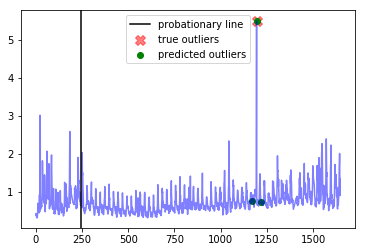




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


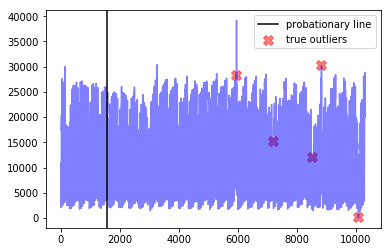




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


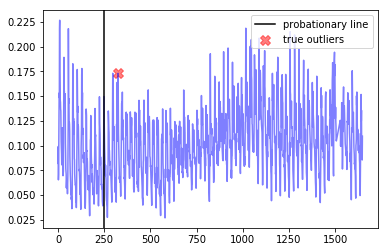




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


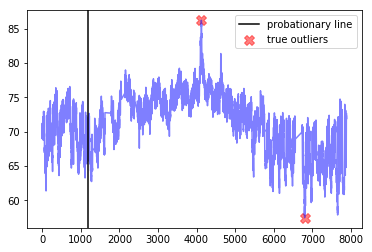

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.6
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


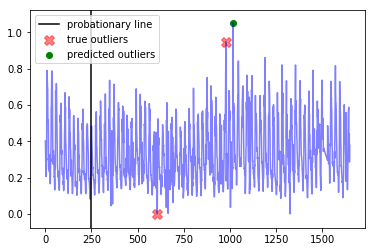




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


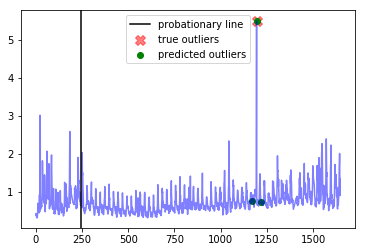




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


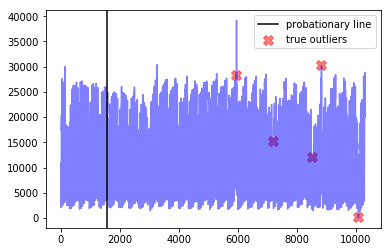




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


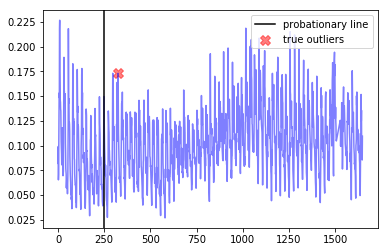




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


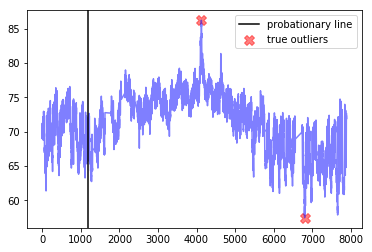

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.7
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


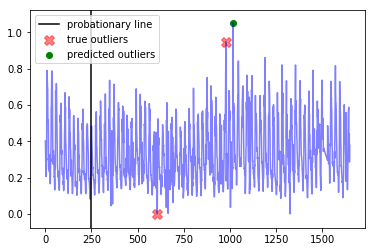




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


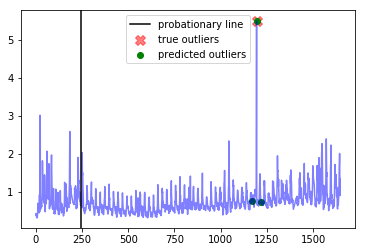




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


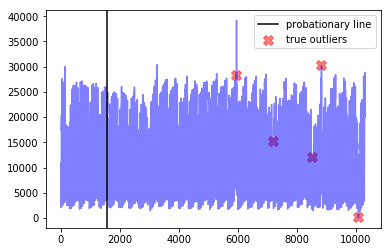




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


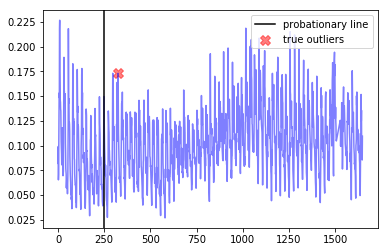




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


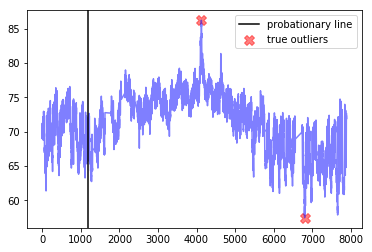

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.8
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


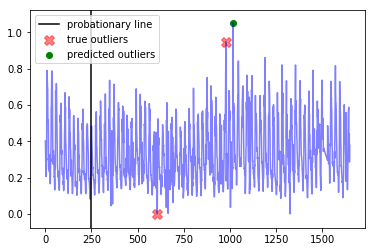




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


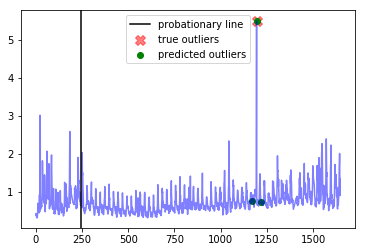




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


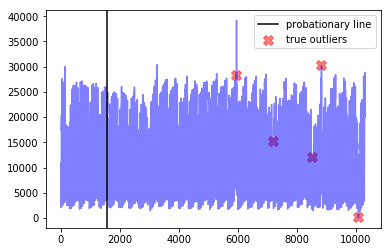




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


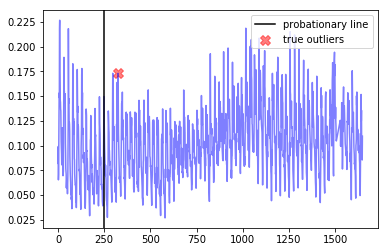




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


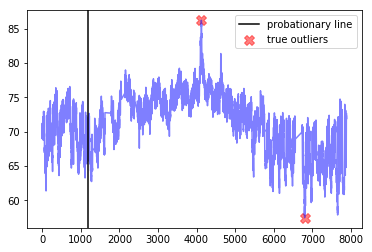

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.9
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


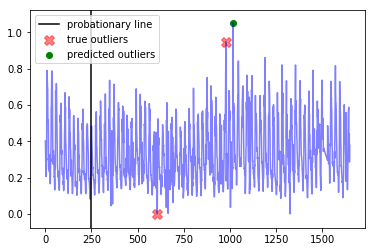




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


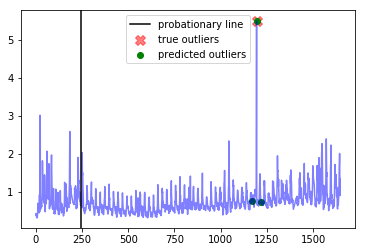




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


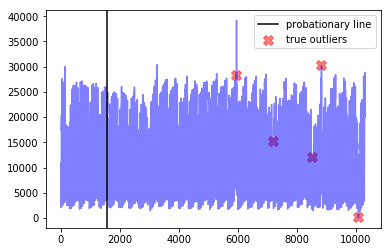




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


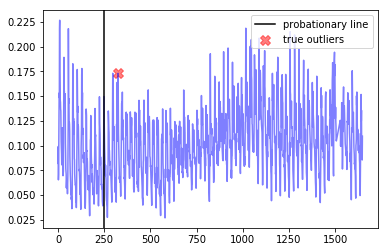




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


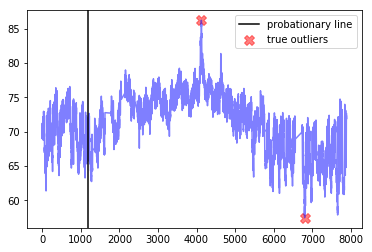

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  11.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.3076923076923077



--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1016]


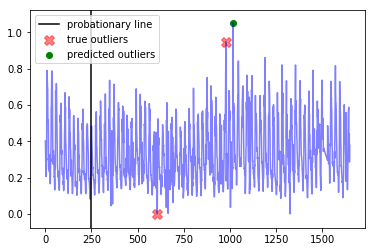




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1170, 1193, 1194, 1218]


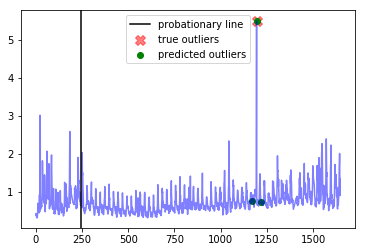




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


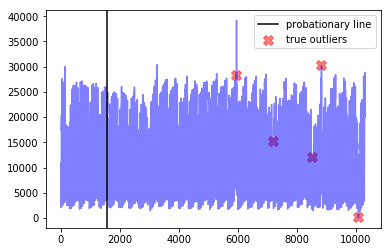




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


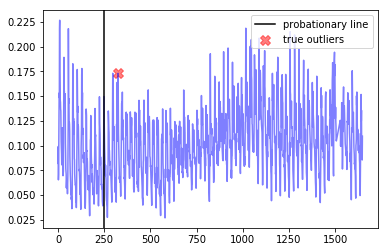




--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


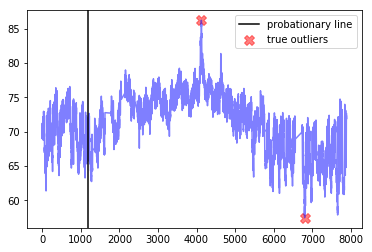

------------
False Positive Weight:  0.1
	 Corresponding window overall recall : 0.8181818181818182
	 Corresponding window overall precision : 0.2903225806451613
	 Minimum number of mistakes : 4.7
	 Best window threshold : 0.9999
	 Corresponding window overall F score : 0.4285714285714286
False Positive Weight:  0.2
	 Corresponding window overall recall : 0.8181818181818182
	 Corresponding window overall precision : 0.2903225806451613
	 Minimum number of mistakes : 7.4
	 Best window threshold : 0.9999
	 Corresponding window overall F score : 0.4285714285714286
False Positive Weight:  0.3
	 Corresponding window overall recall : 0.8181818181818182
	 Corresponding window overall precision : 0.2903225806451613
	 Minimum number of mistakes : 10.1
	 Best window threshold : 0.9999
	 Corresponding window overall F score : 0.4285714285714286
False Positive Weight:  0.6
	 Corresponding window overall recall : 0.18181818181818182
	 Corresponding window overall precision : 1.0
	 Minimum number of 

In [20]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(stl_ad_dict, anomaly_scores_dict, stl_true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# NAB Score

    1. make a python 2.7 virtual environment
    2. pip install pandas
    3. git clone NAB
    4. pip install . in NAB

To obtain NAB scores for every method on the missing uniform datasets, we must do the following:

# Have a new dataset?

1. add the new dataset csv with timestamp, value in respective folder in data folder. no missing time steps allowed

2. add the point anomaly dates to combined_labels.json in labels folder

3. add the anomaly windows to combined_windows.json  (start and end dates)

4. in results/null, include null_datasetname.csv with timestamp, value, label, and anomaly_score (all .5). You can just use the adclasses.create_result_csv function and delete irrelevant columns and fill anomaly_score with all .5s

WARNING: We want datasets with missing time steps. Replace the dataset csv in the data folder with a nonfilled version

In [22]:
# nothing new

# For every anomaly detection method "method_name" and dataset "dataset_name", do the following:

0. clear up previous NAB/results/

1. $ python scripts/create_new_detector.py --detector method_name

this creates the method_name folder in results folder with a bunch of datasets folders that are empty. delete the irrelevant ones

2. for every characteristic relevant dataset, create csvs with columns like so: timestamp, value, anomaly_score, label. place in appropriate locations in results/method_name/

3. replace datasets with no fill

4. $ python run.py -d method_name --optimize --score --normalize

WARNING: HAVE TO MAKE CHANGE TO NAB function convertAnomalyScoresToDetections in util.py bc it will think values are strings

In [21]:
prepath="/pathtonab/NAB/results/"

# Donut

Final score for 'Donut' detector on 'reward_low_FP_rate' profile = 33.59

Final score for 'Donut' detector on 'reward_low_FN_rate' profile = 48.49

Final score for 'Donut' detector on 'standard' profile = 36.36


In [22]:
folder="realKnownCause"
method_name = "Donut"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Donut"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Donut"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Donut"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Donut"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "Donut"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Donut"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Donut"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "Donut"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Donut"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# STL Resid

Final score for 'stl' detector on 'reward_low_FP_rate' profile = 41.51

Final score for 'stl' detector on 'reward_low_FN_rate' profile = 58.78

Final score for 'stl' detector on 'standard' profile = 42.47


In [23]:
folder="realKnownCause"
method_name = "stl"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "stl"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###